# Importando bibliotecas

In [1]:
#importando as bibliotecas
import yfinance as yf
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import random
import plotly.graph_objs as go

from scipy.stats import norm, t

import vectorbt as vbt
from datetime import datetime

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#chamando funcao
import functions as aux

# Verificando estrutura do data frame

In [4]:
carteira_teorica = 'ibov'
url = f'../result/db_matriz_preco_ct_b3_{carteira_teorica}.csv'

In [5]:
df = pd.read_csv(url, index_col=0)

In [6]:
#verificando estrutura da tabela (linhas x colunas)
df.shape

(5960, 70)

In [7]:
#verificando nome das colunas
df.columns

Index(['also3.sa', 'alpa4.sa', 'abev3.sa', 'arzz3.sa', 'b3sa3.sa', 'bbse3.sa',
       'bbdc3.sa', 'bbdc4.sa', 'brap4.sa', 'bbas3.sa', 'brkm5.sa', 'brfs3.sa',
       'bhia3.sa', 'ccro3.sa', 'cmig4.sa', 'ciel3.sa', 'cogn3.sa', 'cple6.sa',
       'csan3.sa', 'cpfe3.sa', 'cvcb3.sa', 'cyre3.sa', 'dxco3.sa', 'elet3.sa',
       'elet6.sa', 'embr3.sa', 'engi11.sa', 'enev3.sa', 'egie3.sa', 'eqtl3.sa',
       'eztc3.sa', 'flry3.sa', 'ggbr4.sa', 'goau4.sa', 'goll4.sa', 'hype3.sa',
       'itsa4.sa', 'itub4.sa', 'jbss3.sa', 'klbn11.sa', 'rent3.sa', 'lren3.sa',
       'mglu3.sa', 'mrfg3.sa', 'beef3.sa', 'mrve3.sa', 'mult3.sa', 'pcar3.sa',
       'petr3.sa', 'petr4.sa', 'prio3.sa', 'radl3.sa', 'rail3.sa', 'sbsp3.sa',
       'sanb11.sa', 'smto3.sa', 'csna3.sa', 'slce3.sa', 'suzb3.sa',
       'taee11.sa', 'vivt3.sa', 'tims3.sa', 'tots3.sa', 'ugpa3.sa', 'usim5.sa',
       'vale3.sa', 'wege3.sa', 'yduq3.sa', 'DATE_UPDATE', 'CARTEIRA_TEORICA'],
      dtype='object')

In [8]:
#excluindo colunas
df.drop(['DATE_UPDATE', 'CARTEIRA_TEORICA'], axis=1, inplace=True)

In [9]:
#confirmando as colunas excluidas
df.columns

Index(['also3.sa', 'alpa4.sa', 'abev3.sa', 'arzz3.sa', 'b3sa3.sa', 'bbse3.sa',
       'bbdc3.sa', 'bbdc4.sa', 'brap4.sa', 'bbas3.sa', 'brkm5.sa', 'brfs3.sa',
       'bhia3.sa', 'ccro3.sa', 'cmig4.sa', 'ciel3.sa', 'cogn3.sa', 'cple6.sa',
       'csan3.sa', 'cpfe3.sa', 'cvcb3.sa', 'cyre3.sa', 'dxco3.sa', 'elet3.sa',
       'elet6.sa', 'embr3.sa', 'engi11.sa', 'enev3.sa', 'egie3.sa', 'eqtl3.sa',
       'eztc3.sa', 'flry3.sa', 'ggbr4.sa', 'goau4.sa', 'goll4.sa', 'hype3.sa',
       'itsa4.sa', 'itub4.sa', 'jbss3.sa', 'klbn11.sa', 'rent3.sa', 'lren3.sa',
       'mglu3.sa', 'mrfg3.sa', 'beef3.sa', 'mrve3.sa', 'mult3.sa', 'pcar3.sa',
       'petr3.sa', 'petr4.sa', 'prio3.sa', 'radl3.sa', 'rail3.sa', 'sbsp3.sa',
       'sanb11.sa', 'smto3.sa', 'csna3.sa', 'slce3.sa', 'suzb3.sa',
       'taee11.sa', 'vivt3.sa', 'tims3.sa', 'tots3.sa', 'ugpa3.sa', 'usim5.sa',
       'vale3.sa', 'wege3.sa', 'yduq3.sa'],
      dtype='object')

In [10]:
#verificando tipo do index
df.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2023-09-06', '2023-09-08', '2023-09-11', '2023-09-12', '2023-09-13',
       '2023-09-14', '2023-09-15', '2023-09-18', '2023-09-19', '2023-09-20'],
      dtype='object', name='date', length=5960)

In [11]:
#convertendo index para data
df.index = pd.to_datetime(df.index)

In [12]:
#confirmando tipo do index
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2023-09-06', '2023-09-08', '2023-09-11', '2023-09-12',
               '2023-09-13', '2023-09-14', '2023-09-15', '2023-09-18',
               '2023-09-19', '2023-09-20'],
              dtype='datetime64[ns]', name='date', length=5960, freq=None)

In [13]:
df

also3.sa  alpa4.sa   abev3.sa   arzz3.sa  b3sa3.sa   bbse3.sa  \
date                                                                         
2000-01-03        NaN       NaN        NaN        NaN       NaN        NaN   
2000-01-04        NaN       NaN        NaN        NaN       NaN        NaN   
2000-01-05        NaN       NaN   0.305528        NaN       NaN        NaN   
2000-01-06        NaN       NaN   0.290040        NaN       NaN        NaN   
2000-01-07        NaN       NaN   0.290040        NaN       NaN        NaN   
...               ...       ...        ...        ...       ...        ...   
2023-09-14  24.120001      8.68  13.530000  72.250000     13.30  31.700001   
2023-09-15  23.559999      8.35  13.420000  70.309998     13.20  31.639999   
2023-09-18  23.469999      8.19  13.390000  70.150002     13.08  31.840000   
2023-09-19  23.219999      8.01  13.430000  69.400002     12.92  31.680000   
2023-09-20  23.500000      8.39  13.470000  68.839996     13.13  32.200001   

             bbdc3.sa  bbdc4.sa   brap4.sa   bbas3.sa  ...   suzb3.sa  \
date                                                   ...              
2000-01-03   1.116639       NaN   1.348684   1.071056  ...        NaN   
2000-01-04   1.035428       NaN   1.252350   1.020115  ...        NaN   
2000-01-05   1.070619       NaN   1.348684   1.030564  ...        NaN   
2000-01-06   1.086861       NaN   1.348684   1.044932  ...        NaN   
2000-01-07   1.105809       NaN   1.348684   1.021421  ...        NaN   
...               ...       ...        ...        ...  ...        ...   
2023-09-14  13.200000     14.95  23.610001  47.389999  ...  51.230000   
2023-09-15  13.130000     14.92  23.809999  47.549999  ...  52.529999   
2023-09-18  13.150000     14.92  23.160000  47.349998  ...  52.049999   
2023-09-19  13.040000     14.75  23.100000  47.279999  ...  52.779999   
2023-09-20  13.060000     14.81  23.379999  47.700001  ...  54.889999   

            taee11.sa   vivt3.sa  tims3.sa   tots3.sa   ugpa3.sa  usim5.sa  \
date                                                                         
2000-01-03        NaN   7.308975       NaN        NaN        NaN  1.509654   
2000-01-04        NaN   7.111023       NaN        NaN        NaN  1.454614   
2000-01-05        NaN   7.190203       NaN        NaN        NaN  1.592999   
2000-01-06        NaN   7.348569       NaN        NaN        NaN  1.737674   
2000-01-07        NaN   7.385113       NaN        NaN        NaN  1.806867   
...               ...        ...       ...        ...        ...       ...   
2023-09-14  34.919998  43.400002     14.95  29.059999  18.750000  6.900000   
2023-09-15  35.310001  43.290001     14.87  29.500000  19.040001  6.940000   
2023-09-18  35.150002  44.130001     15.16  28.290001  19.170000  6.800000   
2023-09-19  35.009998  44.459999     15.31  26.900000  18.750000  6.750000   
2023-09-20  35.090000  44.799999     15.35  27.010000  18.959999  6.760000   

             vale3.sa   wege3.sa   yduq3.sa  
date                                         
2000-01-03   1.616371   0.122314        NaN  
2000-01-04   1.577886   0.118022        NaN  
2000-01-05   1.577886   0.118022        NaN  
2000-01-06   1.577886   0.107293        NaN  
2000-01-07   1.635613   0.107293        NaN  
...               ...        ...        ...  
2023-09-14  70.120003  36.080002  20.900000  
2023-09-15  69.540001  36.099998  20.250000  
2023-09-18  68.720001  35.790001  21.209999  
2023-09-19  68.849998  35.980000  20.330000  
2023-09-20  69.309998  35.790001  20.180000  

[5960 rows x 68 columns]

# Selecionando o ativo para estudo

In [14]:
filter_asset = 'bbas3.sa'

## Calculando o retorno mensal do ativo

In [15]:
#selecionando apenas uma acao
#calculando o retorno mensal
df_retorno_mensal = aux.pfun_pivot_calcular_retorno(filter_asset, df)

M >>>>> RETORNO DO ATIVO CALCULADO COM SUCESSO! >>>>> bbas3.sa


In [16]:
#verificando as últimas linhas dos df
df_retorno_mensal.tail()

return
date             
2023-05  0.041064
2023-06  0.131305
2023-07 -0.024494
2023-08 -0.008695
2023-09  0.019933

In [17]:
#convertendo df para pivot com ano e mes
df_pivot_mensal = aux.pfun_pivot_calcular_retorno(filter_asset, df, 2)

RETORNANDO DF PIVOT!
DF PIVOT MENSAL >>>>> bbas3.sa


In [18]:
df_pivot_mensal

month        1         2         3         4         5         6         7   \
year                                                                          
2000        NaN -0.056962 -0.155705 -0.046105 -0.066667  0.151786 -0.031008   
2001   0.326633 -0.087121  0.005532  0.189822 -0.092486  0.222930 -0.080209   
2002  -0.150142  0.193333  0.080074  0.162931 -0.028910 -0.313740 -0.041157   
2003  -0.018367 -0.002079  0.096875  0.206078  0.204725 -0.144445  0.084797   
2004  -0.150000  0.061275  0.075288 -0.179554  0.089005  0.081731  0.022222   
2005  -0.049231  0.003236 -0.045161 -0.011825  0.049572  0.030945 -0.011058   
2006   0.268958  0.018860  0.017229  0.092793 -0.073373 -0.110676 -0.001601   
2007   0.085937 -0.012950 -0.027842  0.043634  0.137931  0.056440  0.061312   
2008  -0.037829 -0.033504 -0.182526  0.250541  0.125952 -0.196374 -0.040153   
2009  -0.032698 -0.024648  0.218050  0.094250  0.146263  0.009858  0.116147   
2010  -0.029361  0.076227  0.009591  0.004690 -0.120863 -0.051193  0.238945   
2011  -0.052833  0.010414  0.000700 -0.018951 -0.026819  0.007997 -0.060715   
2012   0.147257  0.022652 -0.051268 -0.091329 -0.149412 -0.009077  0.116232   
2013  -0.046875  0.079508  0.041672 -0.061338  0.009718 -0.120880  0.027652   
2014  -0.143852 -0.002722  0.118921  0.025877 -0.018026  0.099137  0.115492   
2015  -0.130837  0.152428 -0.018708  0.161938 -0.129817  0.081310 -0.091845   
2016  -0.060379 -0.022383  0.475472  0.118362 -0.249184  0.051790  0.225261   
2017   0.107512  0.063966  0.023196 -0.027243 -0.131334 -0.051599  0.070896   
2018   0.247014  0.053427 -0.010800 -0.105533 -0.166894 -0.053832  0.134381   
2019   0.115509 -0.013319 -0.023116  0.019705  0.052549  0.043684 -0.087505   
2020  -0.081030 -0.025925 -0.401824  0.021871  0.082106  0.042477  0.044479   
2021  -0.127319 -0.158872  0.090851 -0.026601  0.144227 -0.036020 -0.015562   
2022   0.132062  0.078077  0.015513 -0.042651  0.106807 -0.081668  0.077591   
2023   0.171898  0.010009 -0.020490  0.095883  0.041064  0.131305 -0.024494   

month        8         9         10        11        12  
year                                                     
2000  -0.014399  0.014610 -0.065600 -0.025685  0.049210  
2001   0.014722 -0.176339  0.043360  0.183117  0.162459  
2002   0.263341 -0.264463  0.217228  0.038974 -0.032577  
2003   0.084508  0.038960  0.175000  0.303191 -0.020408  
2004   0.054348  0.039175  0.123413  0.125044  0.020408  
2005   0.114696  0.243910 -0.046083 -0.053140  0.076530  
2006  -0.038076 -0.010417  0.093474  0.138814  0.081995  
2007  -0.047297  0.095390  0.013273  0.015974 -0.044025  
2008  -0.052191 -0.043716 -0.350769 -0.031821  0.026573  
2009   0.114968  0.201357 -0.096701  0.099706 -0.057002  
2010  -0.061156  0.135680  0.030190 -0.002162 -0.038645  
2011   0.024593 -0.059941  0.042673 -0.060868 -0.008792  
2012   0.068995  0.082137 -0.126210  0.016272  0.183578  
2013   0.054268  0.136212  0.150870 -0.133198 -0.038900  
2014   0.273205 -0.273628  0.096047  0.073486 -0.188608  
2015  -0.185192 -0.133445  0.050658  0.029507 -0.080857  
2016   0.109574 -0.012213  0.284649 -0.023183 -0.011433  
2017   0.076825  0.139377 -0.013180 -0.125061  0.066015  
2018  -0.065220 -0.018557  0.451613  0.053963  0.044730  
2019  -0.051608 -0.011421  0.058474  0.000816  0.108872  
2020  -0.014475 -0.089877  0.006077  0.142808  0.149388  
2021  -0.026631 -0.044321 -0.013841  0.132542 -0.088961  
2022   0.164769 -0.069854 -0.038941 -0.042371 -0.005419  
2023  -0.008695  0.019933       NaN       NaN       NaN

### Plotando gráfico do retorno mensal

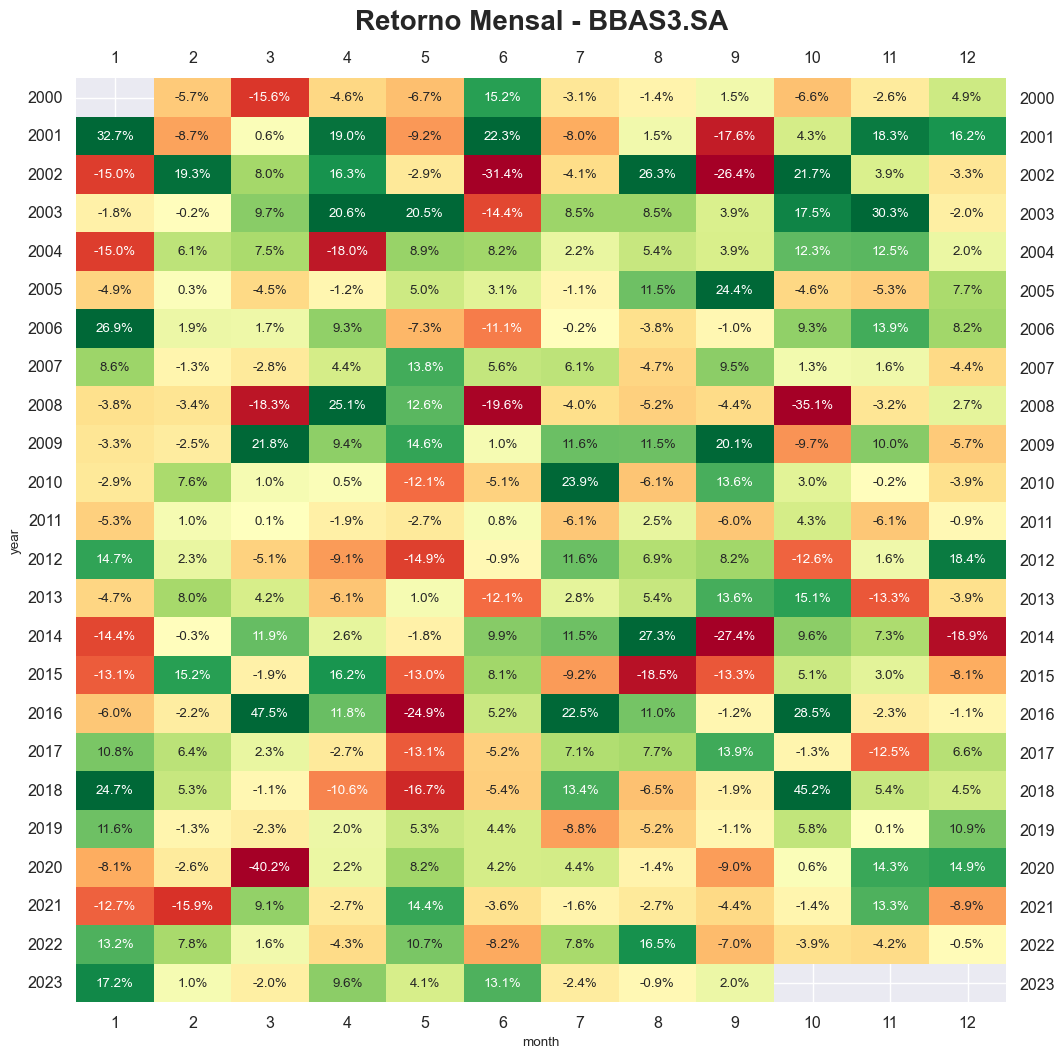

In [19]:
#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_mensal, filter_asset.upper(), 'r')

## Calculando o retorno trimestral do ativo

In [20]:
df_pivot_trimestral = aux.pfun_pivot_calcular_retorno(filter_asset, df, 2, 'Q')

RETORNANDO DF PIVOT!
DF PIVOT TRIMESTRAL >>>>> bbas3.sa


In [21]:
df_pivot_trimestral

quarter         1         2         3         4
year                                           
2000          NaN  0.025437 -0.031008 -0.044799
2001     0.217755  0.320496 -0.231250  0.434959
2002     0.095373 -0.225000 -0.109010  0.223471
2003     0.074490  0.243115  0.222307  0.500000
2004    -0.030000 -0.033505  0.120000  0.289682
2005    -0.089230  0.069256  0.371249 -0.027650
2006     0.315166 -0.099459 -0.049620  0.347368
2007     0.042032  0.254610  0.107565 -0.015863
2008    -0.239803  0.131545 -0.130019 -0.354725
2009     0.149182  0.266663  0.495050 -0.063261
2010     0.054647 -0.161957  0.320996 -0.011764
2011    -0.042300 -0.037627 -0.095301 -0.029402
2012     0.113094 -0.234112  0.291256  0.051028
2013     0.071781 -0.166784  0.230996 -0.041229
2014    -0.044646  0.107254  0.031631 -0.045323
2015    -0.017091  0.093312 -0.358774 -0.005799
2016     0.355353 -0.116829  0.342914  0.240520
2017     0.205688 -0.198601  0.313892 -0.079594
2018     0.299451 -0.294928  0.040719  0.598381
2019     0.075209  0.120174 -0.144480  0.174670
2020    -0.464545  0.152743 -0.063156  0.321511
2021    -0.199276  0.073671 -0.084247  0.017509
2022     0.239383 -0.026935  0.167467 -0.084650
2023     0.159375  0.290689 -0.013700       NaN

### Plotando gráfico do retorno trimestral

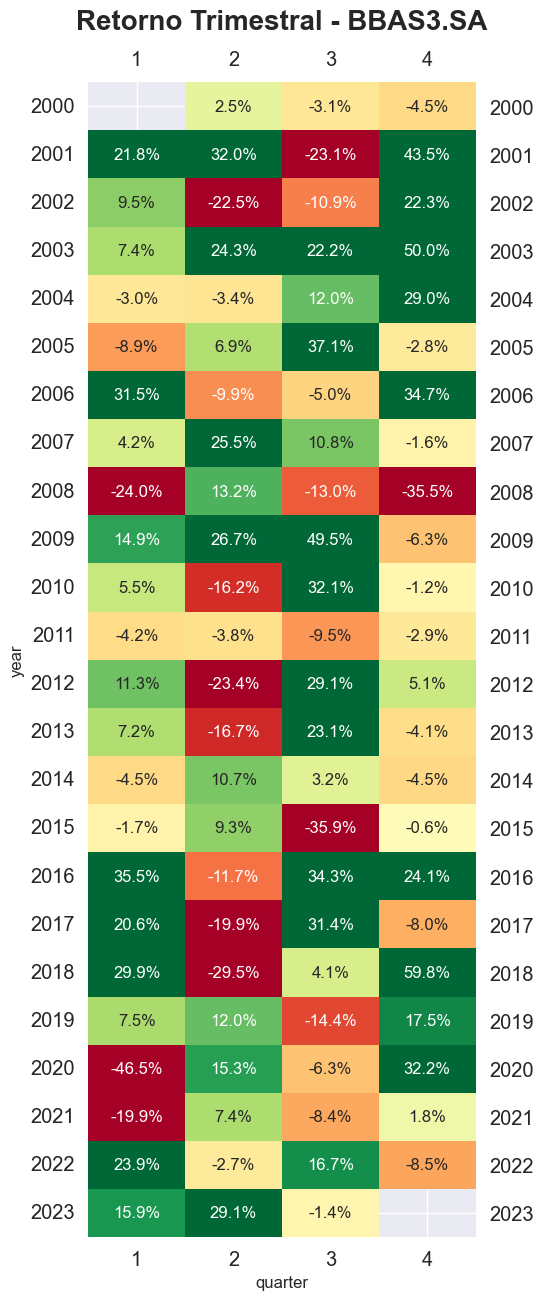

In [22]:
plt.figure(figsize=(5,15))
sns.set(font_scale=1)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_trimestral, filter_asset.upper(), 'r', 'Trimestral')

## Calculando o retorno anual do ativo

In [23]:
#calculando o retorno anual
df_retorno_anual = aux.pfun_pivot_calcular_retorno(filter_asset, df, 1, 'A')

A >>>>> RETORNO DO ATIVO CALCULADO COM SUCESSO! >>>>> bbas3.sa


In [24]:
df_retorno_anual

return
date          
2001  0.773869
2002 -0.074599
2003  1.448979
2004  0.354167
2005  0.298461
2006  0.516588
2007  0.425000
2008 -0.517105
2009  1.038565
2010  0.153814
2011 -0.190687
2012  0.156975
2013  0.053988
2014  0.041818
2015 -0.314918
2016  0.994111
2017  0.168485
2018  0.524078
2019  0.210386
2020 -0.235824
2021 -0.198930
2022  0.288782
2023  0.475892

In [25]:
df_pivot_anual = pd.DataFrame()

for year in range(df_retorno_anual.index.size, 0, -1):
    df_pivot_anual[f"{year}Y"] = df_retorno_anual['return'].rolling(year).mean()

In [26]:
df_pivot_anual

23Y       22Y       21Y       20Y       19Y       18Y       17Y  \
date                                                                         
2001       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2002       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2003       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2004       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2005       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2006       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2007       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2008       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2009       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2010       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2011       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2012       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2013       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2014       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2015       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2016       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2017       NaN       NaN       NaN       NaN       NaN       NaN  0.313383   
2018       NaN       NaN       NaN       NaN       NaN  0.325088  0.298689   
2019       NaN       NaN       NaN       NaN  0.319051  0.293784  0.315453   
2020       NaN       NaN       NaN  0.291308  0.265910  0.284827  0.216347   
2021       NaN       NaN  0.267963  0.242668  0.259366  0.193276  0.183812   
2022       NaN  0.268909  0.244864  0.260837  0.198303  0.189644  0.183243   
2023  0.277909  0.255365  0.271077  0.212182  0.204709  0.199501  0.180849   

           16Y       15Y       14Y  ...       10Y        9Y        8Y  \
date                                ...                                 
2001       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2002       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2003       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2004       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2005       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2006       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2007       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2008       NaN       NaN       NaN  ...       NaN       NaN  0.403170   
2009       NaN       NaN       NaN  ...       NaN  0.473769  0.436257   
2010       NaN       NaN       NaN  ...  0.441774  0.404874  0.464809   
2011       NaN       NaN       NaN  ...  0.345318  0.391976  0.259850   
2012       NaN       NaN       NaN  ...  0.368476  0.248420  0.235201   
2013       NaN       NaN       NaN  ...  0.228977  0.215067  0.204642   
2014       NaN       NaN  0.319988  ...  0.197742  0.186551  0.145296   
2015       NaN  0.277661  0.242218  ...  0.136404  0.094161  0.052806   
2016  0.322439  0.292344  0.318554  ...  0.184156  0.157396  0.241708   
2017  0.284603  0.308549  0.227090  ...  0.158505  0.233572  0.132948   
2018  0.322020  0.246889  0.239227  ...  0.262623  0.176407  0.179231   
2019  0.244608  0.237304  0.232936  ...  0.179805  0.182693  0.229365   
2020  0.207733  0.201685  0.179192  ...  0.140841  0.177678  0.180266   
2021  0.176647  0.153984  0.134625  ...  0.140017  0.138133  0.148651   
2022  0.162409  0.144903  0.192189  ...  0.153198  0.164221  0.179521   
2023  0.165589  0.211102  0.151998  ...  0.195388  0.212451  0.278373   

            7Y        6Y        5Y        4Y        3Y        2Y        1Y  
date                                                                        
2001       NaN       NaN       NaN       NaN       NaN       NaN  0.773869  
200

### Plotando gráfico de janela de retorno anual

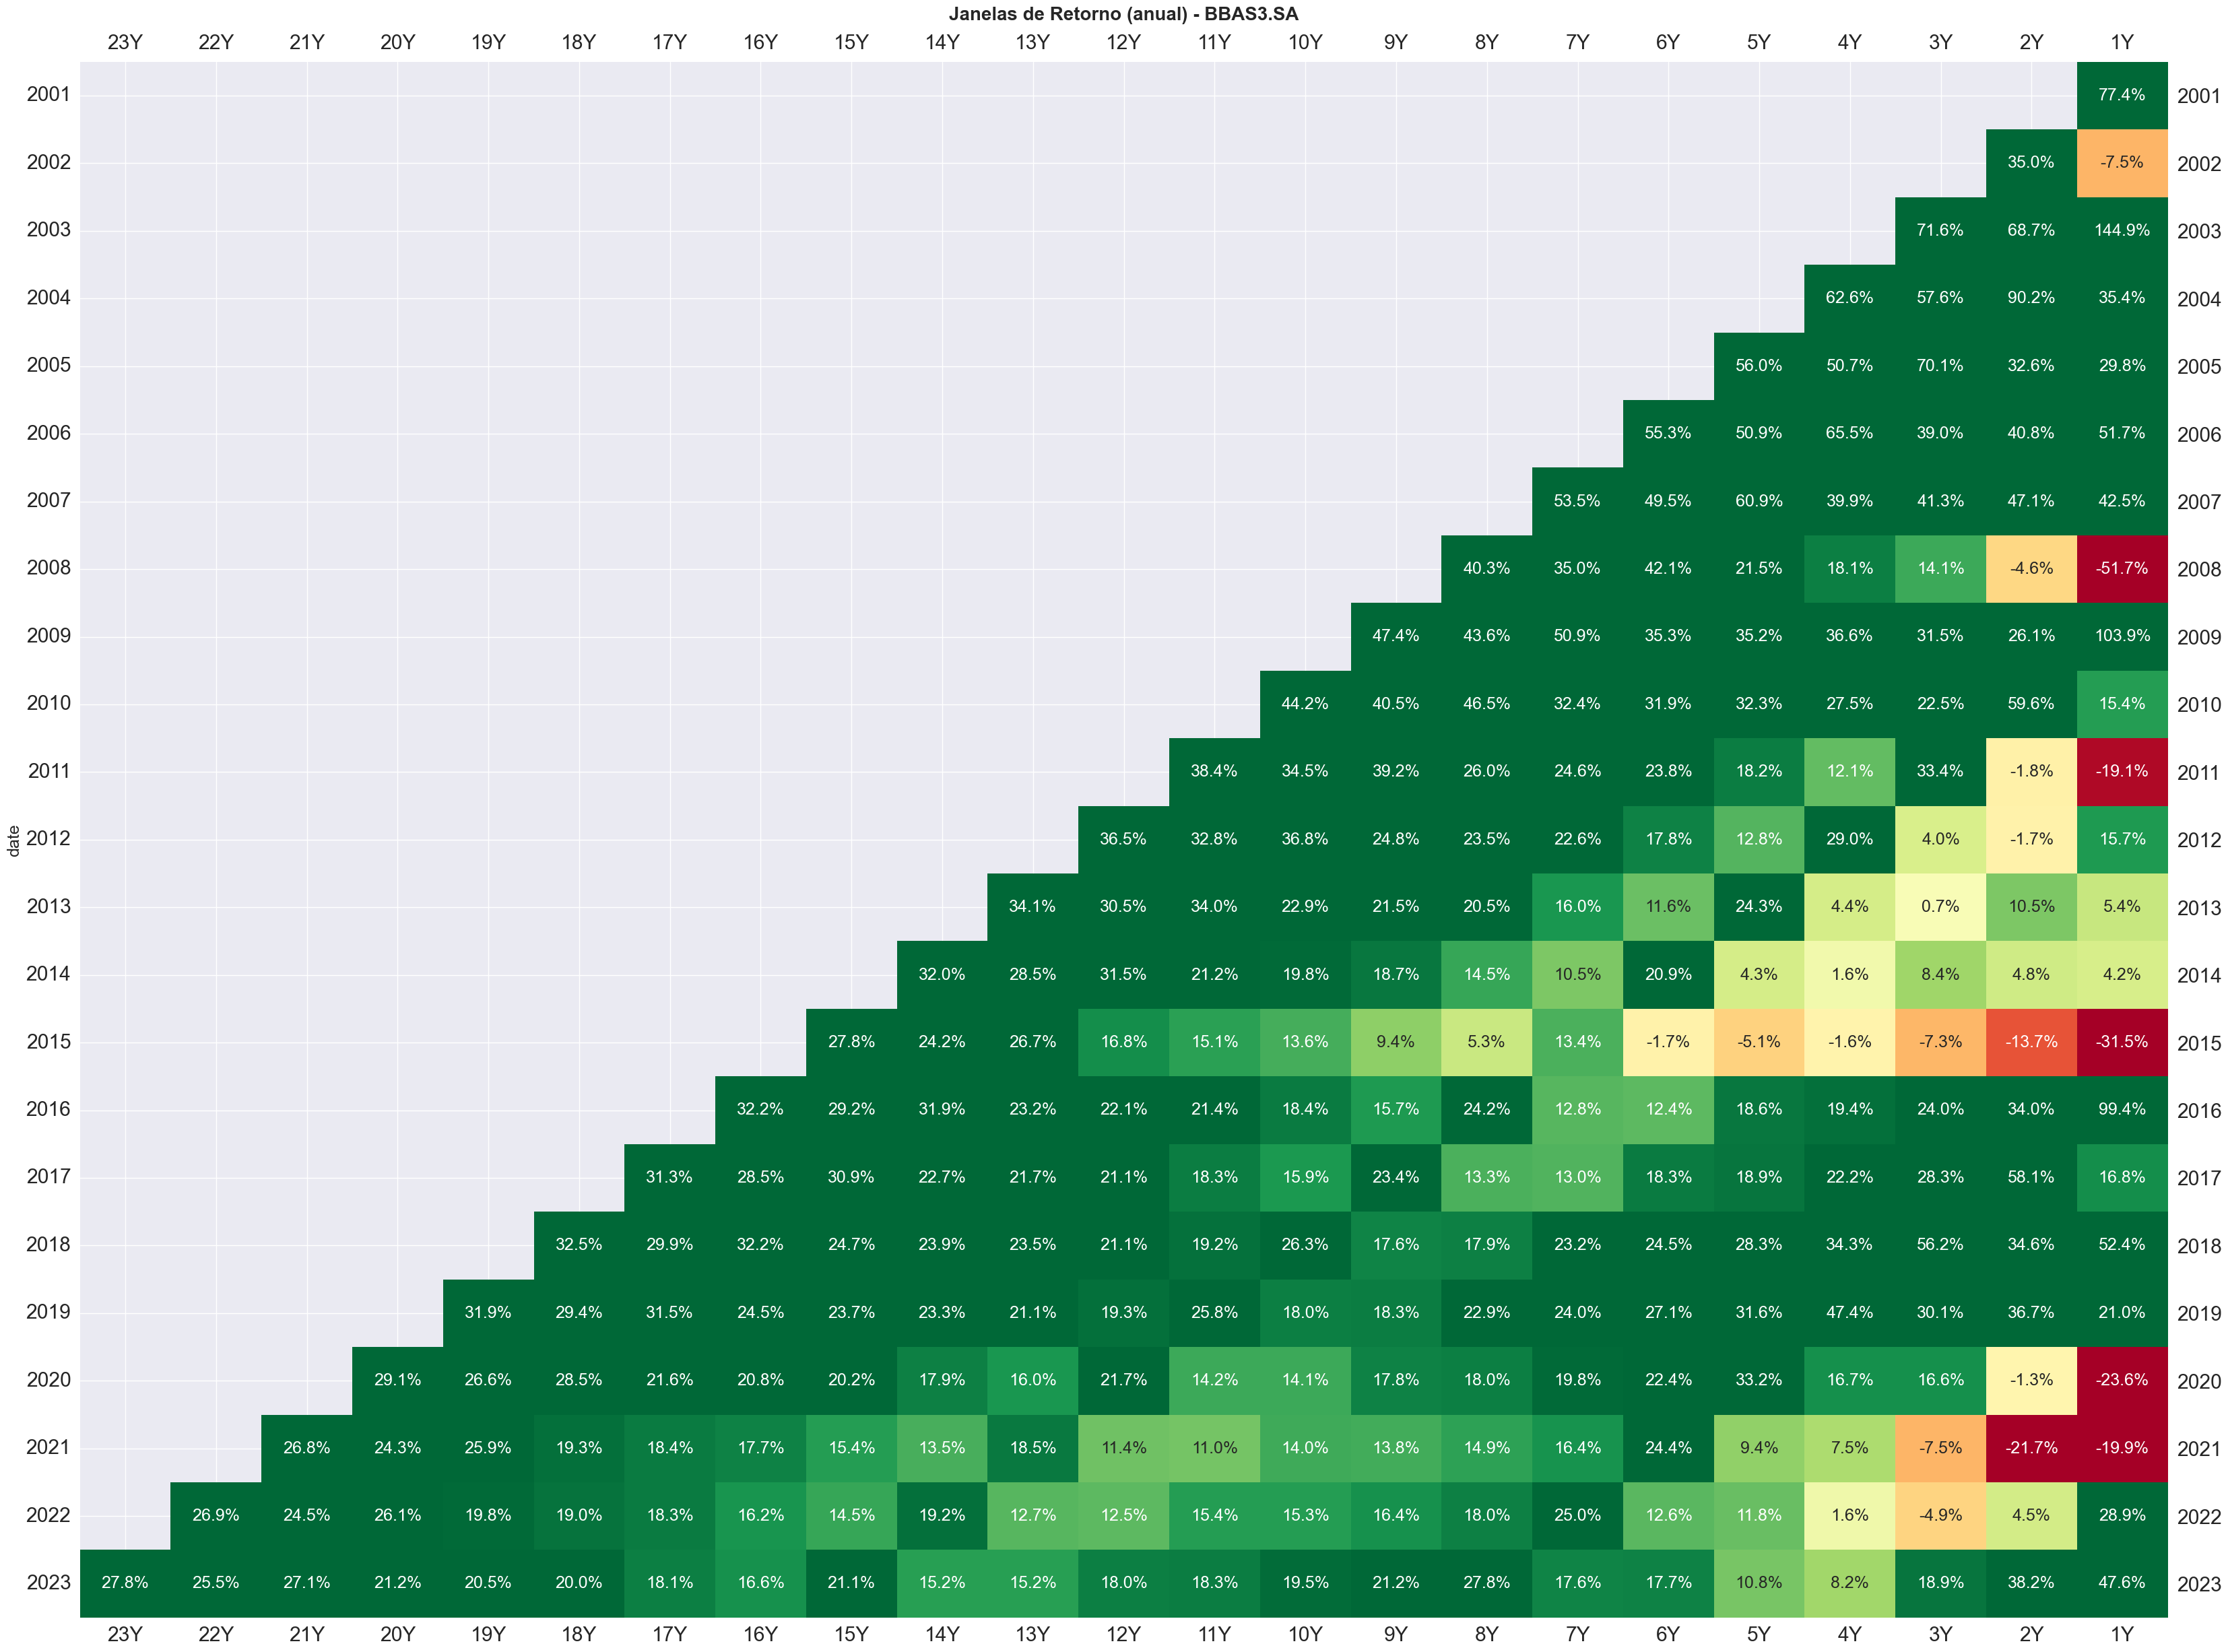

In [27]:
plt.figure(figsize=(40,30))
sns.set(font_scale=1.5)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_anual, filter_asset.upper(), 'r', 'Anual')

In [28]:
df_pivot_retorno_real = pd.DataFrame()

NUMBER_BASE = 100

for year in range(df_retorno_anual.index.size, 0, -1):
    df_pivot_retorno_real[f"{year}Y"] = NUMBER_BASE * np.exp(year * df_retorno_anual['return'].rolling(year).mean())

In [29]:
df_pivot_retorno_real

23Y           22Y           21Y           20Y           19Y  \
date                                                                         
2001           NaN           NaN           NaN           NaN           NaN   
2002           NaN           NaN           NaN           NaN           NaN   
2003           NaN           NaN           NaN           NaN           NaN   
2004           NaN           NaN           NaN           NaN           NaN   
2005           NaN           NaN           NaN           NaN           NaN   
2006           NaN           NaN           NaN           NaN           NaN   
2007           NaN           NaN           NaN           NaN           NaN   
2008           NaN           NaN           NaN           NaN           NaN   
2009           NaN           NaN           NaN           NaN           NaN   
2010           NaN           NaN           NaN           NaN           NaN   
2011           NaN           NaN           NaN           NaN           NaN   
2012           NaN           NaN           NaN           NaN           NaN   
2013           NaN           NaN           NaN           NaN           NaN   
2014           NaN           NaN           NaN           NaN           NaN   
2015           NaN           NaN           NaN           NaN           NaN   
2016           NaN           NaN           NaN           NaN           NaN   
2017           NaN           NaN           NaN           NaN           NaN   
2018           NaN           NaN           NaN           NaN           NaN   
2019           NaN           NaN           NaN           NaN  42922.263000   
2020           NaN           NaN           NaN  33905.134188  15637.894795   
2021           NaN           NaN  27788.907931  12816.938469  13809.631721   
2022           NaN  37092.658248  17108.060512  18433.108319   4328.277304   
2023  59698.757909  27534.558347  29667.155794   6966.143468   4888.547389   

               18Y           17Y           16Y           15Y          14Y  \
date                                                                        
2001           NaN           NaN           NaN           NaN          NaN   
2002           NaN           NaN           NaN           NaN          NaN   
2003           NaN           NaN           NaN           NaN          NaN   
2004           NaN           NaN           NaN           NaN          NaN   
2005           NaN           NaN           NaN           NaN          NaN   
2006           NaN           NaN           NaN           NaN          NaN   
2007           NaN           NaN           NaN           NaN          NaN   
2008           NaN           NaN           NaN           NaN          NaN   
2009           NaN           NaN           NaN           NaN          NaN   
2010           NaN           NaN           NaN           NaN          NaN   
2011           NaN           NaN           NaN           NaN          NaN   
2012           NaN           NaN           NaN           NaN          NaN   
2013           NaN           NaN           NaN           NaN          NaN   
2014           NaN           NaN           NaN           NaN  8821.994770   
2015           NaN           NaN           NaN   6438.723680  2969.700192   
2016           NaN           NaN  17399.500364   8025.084185  8646.640334   
2017           NaN  20592.491346   9497.771383  10233.389611  2402.901737   
2018  34778.668472  16040.790626  17283.176602   4058.261892  2847.918029   
2019  19796.819839  21330.116539   5008.523669   3514.771899  2607.816200   
2020  16849.075817   3956.330706   2776.386997   2059.964970  1228.877507   
2021   3242.638980   2275.548069   1688.363083   1007.197426   658.474954   
2022   3037.403524   2253.628498   1344.407992    878.932936  1474.116112   
2023   3627.101115   2163.756685   1414.598118   2372.515345   839.781234   

      ...          10Y           9Y           8Y           7Y           6Y  \
date  ...                                                   

### Plotando gráfico de janela de retorno reais por ano

plt.figure(figsize=(40,30))
sns.set(font_scale=1.7)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_retorno_real, filter_asset.upper(), 'r', 'anual_real', '.0f', NUMBER_BASE)

### Plotando gráfico da quantidade de retorno negativo x retorno negativo

In [31]:
retorno_neg = df_pivot_retorno_real[df_pivot_retorno_real < NUMBER_BASE].count()
retorno_pos = df_pivot_retorno_real[df_pivot_retorno_real >= NUMBER_BASE].count()

total_de_janelas = df_pivot_retorno_real.count()
pd.concat([-retorno_neg, retorno_pos], 
          axis=1, 
          keys=['retorno_negativo','retorno_positivo']).style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

## Obtendo os dividendos do ativo

In [32]:
#obtendo a data atual
data_atual = datetime.today()
data_atual = data_atual.strftime('%Y-%m-%d')
data_atual

'2023-11-30'

In [33]:
data_inicial = '2000-01-01'

In [34]:
#verificando o ativo utilizado
filter_asset

'bbas3.sa'

In [35]:
#obtendo os dividendos da empresa
#obtendo os dividendos dos ativos atraves do vectorbt
df_tickers_dividends = vbt.YFData.download(filter_asset, start=data_inicial, end=data_atual).get('Dividends')

In [36]:
#verificando as últimas linhas do df
df_tickers_dividends.tail()

Date
2023-11-23 03:00:00+00:00    0.0
2023-11-24 03:00:00+00:00    0.0
2023-11-27 03:00:00+00:00    0.0
2023-11-28 03:00:00+00:00    0.0
2023-11-29 03:00:00+00:00    0.0
Name: Dividends, dtype: float64

In [37]:
df_ticker = pd.DataFrame(df_tickers_dividends)

In [38]:
df_ticker

Dividends
Date                                
2000-01-03 02:00:00+00:00        0.0
2000-01-04 02:00:00+00:00        0.0
2000-01-05 02:00:00+00:00        0.0
2000-01-06 02:00:00+00:00        0.0
2000-01-07 02:00:00+00:00        0.0
...                              ...
2023-11-23 03:00:00+00:00        0.0
2023-11-24 03:00:00+00:00        0.0
2023-11-27 03:00:00+00:00        0.0
2023-11-28 03:00:00+00:00        0.0
2023-11-29 03:00:00+00:00        0.0

[5915 rows x 1 columns]

In [39]:
#alterando nome de uma coluna especifica
df_ticker.rename(columns = {'Dividends':'dividendos_pagos'}, inplace = True)

In [40]:
df_ticker

dividendos_pagos
Date                                       
2000-01-03 02:00:00+00:00               0.0
2000-01-04 02:00:00+00:00               0.0
2000-01-05 02:00:00+00:00               0.0
2000-01-06 02:00:00+00:00               0.0
2000-01-07 02:00:00+00:00               0.0
...                                     ...
2023-11-23 03:00:00+00:00               0.0
2023-11-24 03:00:00+00:00               0.0
2023-11-27 03:00:00+00:00               0.0
2023-11-28 03:00:00+00:00               0.0
2023-11-29 03:00:00+00:00               0.0

[5915 rows x 1 columns]

In [41]:
df_ticker.index

DatetimeIndex(['2000-01-03 02:00:00+00:00', '2000-01-04 02:00:00+00:00',
               '2000-01-05 02:00:00+00:00', '2000-01-06 02:00:00+00:00',
               '2000-01-07 02:00:00+00:00', '2000-01-10 02:00:00+00:00',
               '2000-01-11 02:00:00+00:00', '2000-01-12 02:00:00+00:00',
               '2000-01-13 02:00:00+00:00', '2000-01-14 02:00:00+00:00',
               ...
               '2023-11-16 03:00:00+00:00', '2023-11-17 03:00:00+00:00',
               '2023-11-20 03:00:00+00:00', '2023-11-21 03:00:00+00:00',
               '2023-11-22 03:00:00+00:00', '2023-11-23 03:00:00+00:00',
               '2023-11-24 03:00:00+00:00', '2023-11-27 03:00:00+00:00',
               '2023-11-28 03:00:00+00:00', '2023-11-29 03:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=5915, freq=None)

In [42]:
#verificando o total de dividendos pagos no periodo por ordem decrescente
df_total_dividends = df_ticker.sum()
df_total_dividends

dividendos_pagos    27.622356
dtype: float64

In [43]:
df_ticker['month'] = df_ticker.index.month
df_ticker['quarter'] = df_ticker.index.quarter
df_ticker['year'] = df_ticker.index.year

In [44]:
#verificando a quantidade de anos
len(df_ticker.year.drop_duplicates())

24

In [45]:
media_dividendos_por_ano = df_total_dividends/len(df_ticker.year.drop_duplicates())
media_dividendos_por_ano

dividendos_pagos    1.150931
dtype: float64

In [46]:
df_ticker

dividendos_pagos  month  quarter  year
Date                                                             
2000-01-03 02:00:00+00:00               0.0      1        1  2000
2000-01-04 02:00:00+00:00               0.0      1        1  2000
2000-01-05 02:00:00+00:00               0.0      1        1  2000
2000-01-06 02:00:00+00:00               0.0      1        1  2000
2000-01-07 02:00:00+00:00               0.0      1        1  2000
...                                     ...    ...      ...   ...
2023-11-23 03:00:00+00:00               0.0     11        4  2023
2023-11-24 03:00:00+00:00               0.0     11        4  2023
2023-11-27 03:00:00+00:00               0.0     11        4  2023
2023-11-28 03:00:00+00:00               0.0     11        4  2023
2023-11-29 03:00:00+00:00               0.0     11        4  2023

[5915 rows x 4 columns]

In [47]:
df_dividendo_mensal = aux.pfun_pivot_por_ano(df_ticker, coluna_aux='month')
df_dividendo_mensal

month   1         2         3    4         5         6    7         8   \
year                                                                     
2000   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
2001   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
2002   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
2003   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
2004   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
2005   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
2006   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
2007   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
2008   0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
2009   0.0  0.000000  0.000000  0.0  0.000000  0.180221  0.0  0.190873   
2010   0.0  0.468197  0.201718  0.0  0.380778  0.000000  0.0  0.200650   
2011   0.0  0.326180  0.215096  0.0  0.156962  0.262432  0.0  0.212075   
2012   0.0  0.156996  0.293279  0.0  0.063310  0.298239  0.0  0.124066   
2013   0.0  0.000000  0.526247  0.0  0.098210  0.281982  0.0  0.780872   
2014   0.0  0.132155  0.314638  0.0  0.081217  0.321041  0.0  0.078780   
2015   0.0  0.091200  0.376992  0.0  0.451138  0.289894  0.0  0.141039   
2016   0.0  0.000000  0.188853  0.0  0.133683  0.137755  0.0  0.139965   
2017   0.0  0.000000  0.098022  0.0  0.182939  0.078574  0.0  0.204303   
2018   0.0  0.000000  0.327380  0.0  0.213954  0.077203  0.0  0.269662   
2019   0.0  0.591888  0.156124  0.0  0.414838  0.171054  0.0  0.446155   
2020   0.0  0.438882  0.181420  0.0  0.000000  0.000000  0.0  0.441988   
2021   0.0  0.435863  0.145714  0.0  0.414445  0.168519  0.0  0.348288   
2022   0.0  0.000000  1.035349  0.0  0.155347  0.250285  0.0  0.204622   
2023   0.0  0.826881  0.352037  0.0  0.000000  0.993051  0.0  0.668883   

month        9    10        11        12  
year                                      
2000   0.000000  0.0  0.000000  0.000000  
2001   0.000000  0.0  0.000000  0.000000  
2002   0.000000  0.0  0.000000  0.000000  
2003   0.000000  0.0  0.000000  0.000000  
2004   0.000000  0.0  0.000000  0.000000  
2005   0.000000  0.0  0.000000  0.000000  
2006   0.000000  0.0  0.000000  0.000000  
2007   0.000000  0.0  0.000000  0.000000  
2008   0.000000  0.0  0.000000  0.000000  
2009   0.185397  0.0  0.122897  0.189043  
2010   0.200244  0.0  0.131424  0.203766  
2011   0.278181  0.0  0.125885  0.280441  
2012   0.285821  0.0  0.106932  0.297177  
2013   0.313771  0.0  0.066615  0.309285  
2014   0.336522  0.0  0.055718  0.339949  
2015   0.266078  0.0  0.170805  0.274491  
2016   0.126652  0.0  0.109871  0.076932  
2017   0.076292  0.0  0.223237  0.082597  
2018   0.085491  0.0  0.416893  0.125670  
2019   0.232955  0.0  0.365042  0.176174  
2020   0.102862  0.0  0.194773  0.116984  
2021   0.184739  0.0  0.393703  0.174991  
2022   0.273736  0.0  0.170206  0.345525  
2023   0.334197  0.0  0.101989       NaN

In [48]:
media_dividendo_aux = media_dividendos_por_ano[0]
media_dividendo_aux

1.1509315

### Plotando gráfico da soma dos dividendos mensal

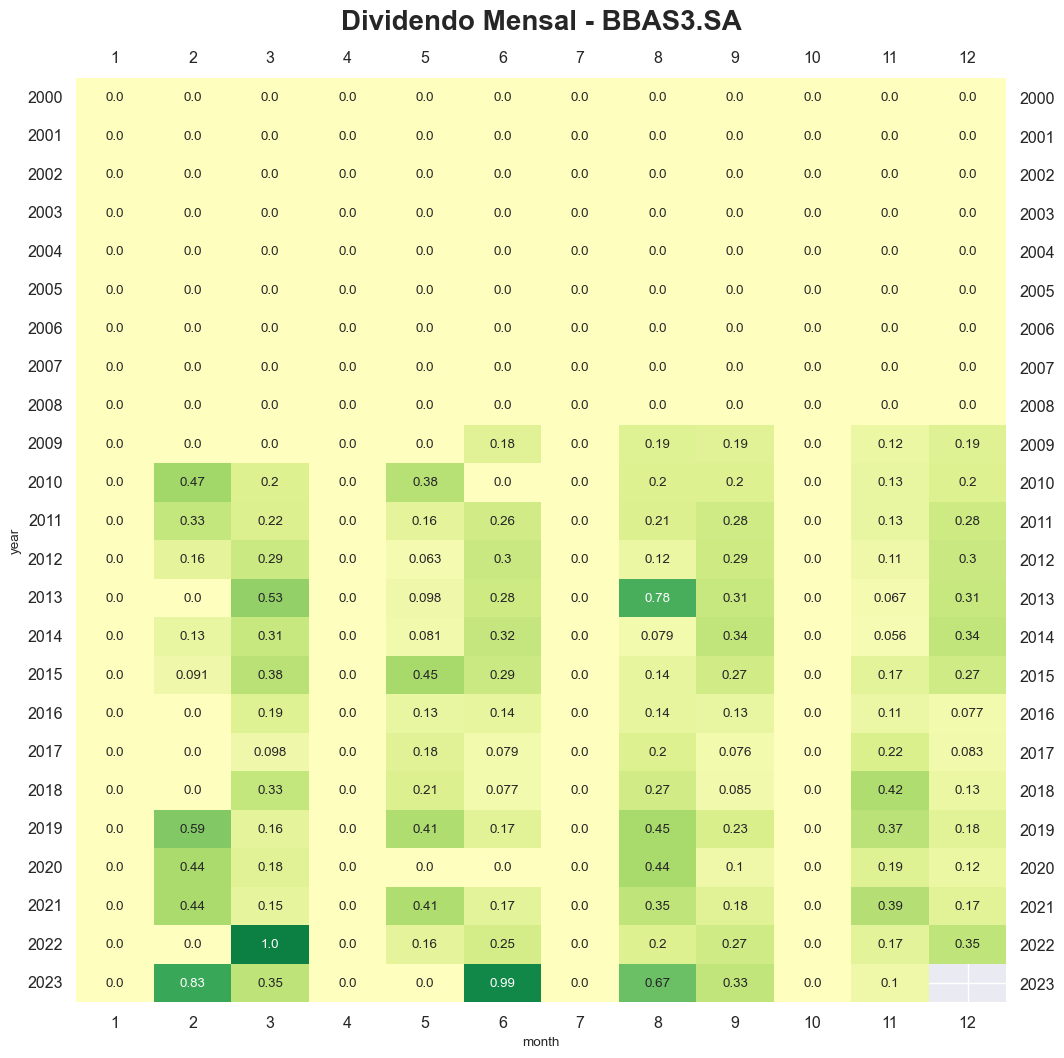

In [49]:
#visualizando grafico
plt.figure(figsize=(12,12))
sns.set(font_scale=0.8)

aux.pfun_gerar_grafico_retorno_pivot(df_dividendo_mensal, filter_asset.upper(), 'd', 'Mensal', '.2', media_dividendo_aux)

In [50]:
df_dividendo_trimestral = aux.pfun_pivot_por_ano(df_ticker, coluna_aux='quarter')
df_dividendo_trimestral

quarter         1         2         3         4
year                                           
2000     0.000000  0.000000  0.000000  0.000000
2001     0.000000  0.000000  0.000000  0.000000
2002     0.000000  0.000000  0.000000  0.000000
2003     0.000000  0.000000  0.000000  0.000000
2004     0.000000  0.000000  0.000000  0.000000
2005     0.000000  0.000000  0.000000  0.000000
2006     0.000000  0.000000  0.000000  0.000000
2007     0.000000  0.000000  0.000000  0.000000
2008     0.000000  0.000000  0.000000  0.000000
2009     0.000000  0.180221  0.376270  0.311940
2010     0.669915  0.380778  0.400894  0.335190
2011     0.541276  0.419394  0.490256  0.406326
2012     0.450275  0.361549  0.409887  0.404109
2013     0.526247  0.380192  1.094643  0.375900
2014     0.446793  0.402258  0.415302  0.395667
2015     0.468192  0.741032  0.407117  0.445296
2016     0.188853  0.271438  0.266617  0.186803
2017     0.098022  0.261513  0.280595  0.305834
2018     0.327380  0.291157  0.355153  0.542563
2019     0.748012  0.585892  0.679110  0.541216
2020     0.620302  0.000000  0.544850  0.311757
2021     0.581577  0.582964  0.533027  0.568694
2022     1.035349  0.405632  0.478358  0.515731
2023     1.178918  0.993051  1.003080  0.101989

### Plotando gráfico da soma dos dividendos trimestral

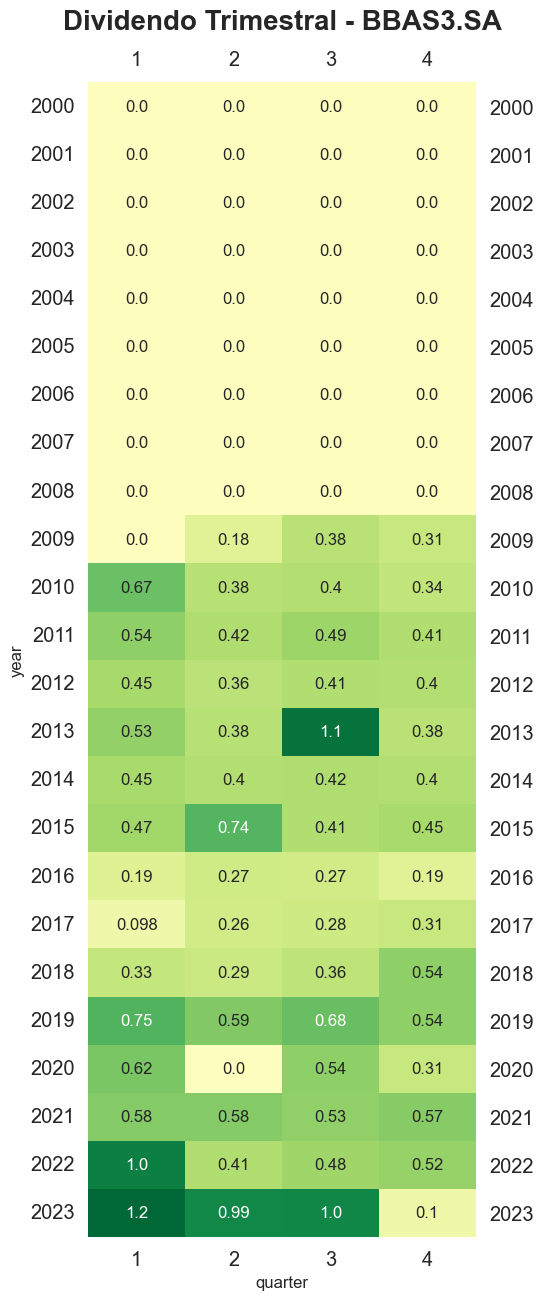

In [51]:
plt.figure(figsize=(5,15))
sns.set(font_scale=1)

aux.pfun_gerar_grafico_retorno_pivot(df_dividendo_trimestral, filter_asset.upper(), 'd', 'Trimestral', '.2', media_dividendo_aux)

In [52]:
df_dividendo_anual = aux.pfun_pivot_por_ano(df_ticker)
df_dividendo_anual

dividendos_pagos
year                  
2000          0.000000
2001          0.000000
2002          0.000000
2003          0.000000
2004          0.000000
2005          0.000000
2006          0.000000
2007          0.000000
2008          0.000000
2009          0.868431
2010          1.786777
2011          1.857252
2012          1.625820
2013          2.376982
2014          1.660020
2015          2.061637
2016          0.913711
2017          0.945964
2018          1.516253
2019          2.554230
2020          1.476909
2021          2.266262
2022          2.435070
2023          3.277038

In [53]:
df_pivot_dividendo_anual = pd.DataFrame()

for year in range(df_dividendo_anual.index.size, 0, -1):
    df_pivot_dividendo_anual[f"{year}Y"] = df_dividendo_anual['dividendos_pagos'].rolling(year).sum()

### Plotando gráfico da janela de dividendos por ano

plt.figure(figsize=(40,30))
sns.set(font_scale=2)

aux.pfun_gerar_grafico_retorno_pivot(df_pivot_dividendo_anual, filter_asset.upper(), 'd', 'Anual', '.2', media_dividendo_aux)

# Estudo de caso: Ação aleatória (random)

## Selecionando uma ação aleatória e verificando o resultado quantitativo

In [55]:
#selecionando apenas UMA acao da carteira
RANDON_NUMBER = 1
carteira = random.sample(list(df.columns) , k=RANDON_NUMBER)
carteira

['tims3.sa']

In [56]:
carteira[0]

'tims3.sa'

In [57]:
df_asset = aux.pfun_pivot_calcular_retorno(str(carteira[0]), df, 1, 'D')

D >>>>> RETORNO DO ATIVO CALCULADO COM SUCESSO! >>>>> tims3.sa


In [58]:
df_asset

return
date                
2005-07-11  0.068783
2005-07-12 -0.009901
2005-07-13  0.042500
2005-07-14  0.026379
2005-07-15 -0.072430
...              ...
2023-09-14  0.003356
2023-09-15 -0.005351
2023-09-18  0.019502
2023-09-19  0.009894
2023-09-20  0.002613

[4526 rows x 1 columns]

In [59]:
df_media = df_asset['return'].mean()
print('Média dos retornos: {:.2f}%'.format(df_media*100))

Média dos retornos: 0.09%


In [60]:
df_desvio_padrao = df_asset['return'].std()
print('Desvio padrão dos retornos: {:.2f}%'.format(df_desvio_padrao*100))

Desvio padrão dos retornos: 3.29%


### Dado uma porcentagem "x", iremos verificar o comportamento da ação com e sem os seus principais retornos

#### No exemplo abaixo iremos utilizar 10%

In [61]:
NUMBER = 10
PERCENT_NUMBER = NUMBER/100
#verificando os piores retornos
df_asset[df_asset["return"] < -PERCENT_NUMBER]

return
date                
2006-05-23 -0.194444
2006-05-24 -0.126437
2007-03-01 -0.105263
2008-05-26 -0.265185
2008-05-28 -0.228879
2008-07-07 -0.225869
2008-07-10 -0.204887
2008-07-14 -0.246869
2008-07-25 -0.246268
2008-10-22 -0.219198
2009-07-16 -0.226950
2009-10-30 -0.110032
2009-11-11 -0.254237
2010-11-08 -0.159420
2011-02-01 -0.165554
2011-02-03 -0.182550
2011-02-08 -0.173207
2011-03-21 -0.140562
2011-03-24 -0.158025
2011-03-29 -0.202325
2011-04-04 -0.150358
2011-05-09 -0.156036
2011-06-07 -0.126697
2011-07-18 -0.155429
2011-07-25 -0.153235
2011-07-29 -0.162011
2020-03-12 -0.147771
2020-03-23 -0.113833

In [62]:
#verificando a probabilidade da acao cair mais que a porcentagem informada
probabilidade_teorica = norm.cdf(-PERCENT_NUMBER, loc=df_media, scale=df_desvio_padrao)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.10928072%


In [63]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 915 dias
Ou uma vez a cada 3 anos


#### Plotando gráfico do retorno diário da ação

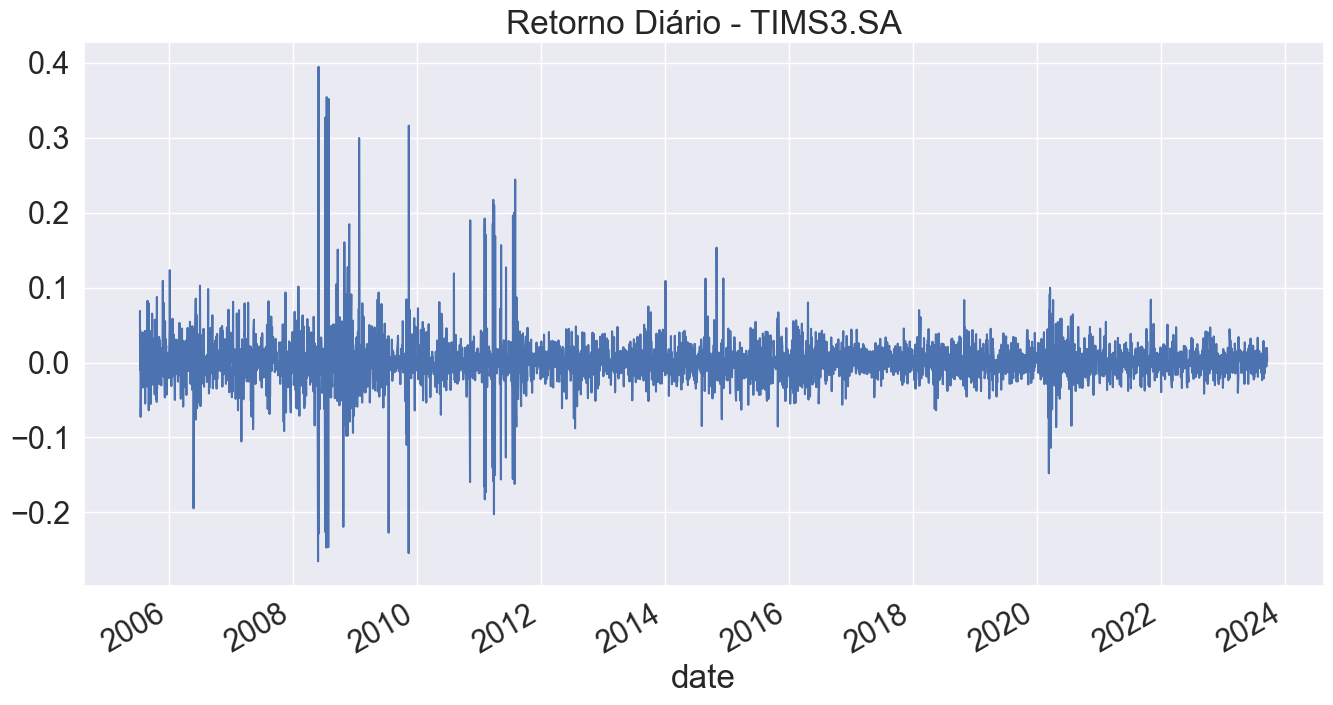

In [64]:
df_asset['return'].plot(title=f"Retorno Diário - {carteira[0].upper()}");

In [65]:
#criando um retorno teorico apenas para exemplo
df_asset['retorno_teorico'] = norm.rvs(size=df_asset['return'].size,  loc=df_media, scale=df_desvio_padrao)

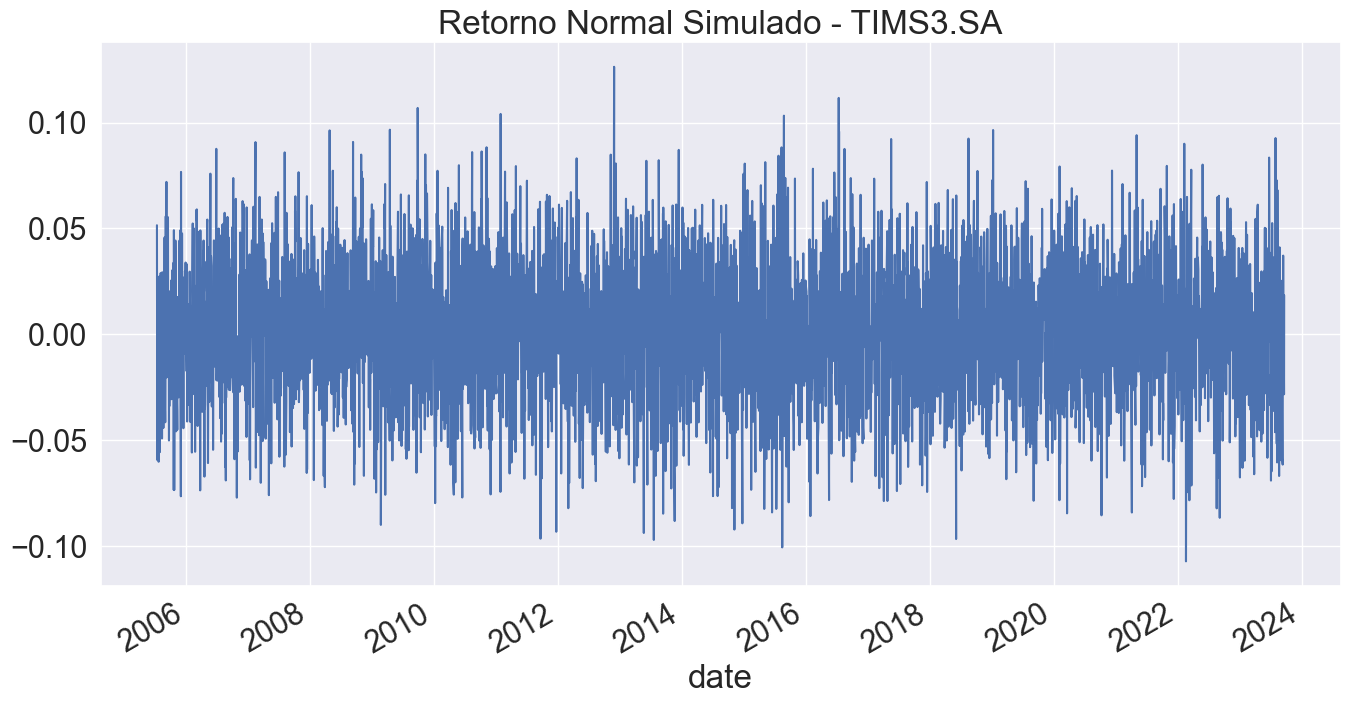

In [66]:
ax = df_asset['retorno_teorico'].plot(title=f"Retorno Normal Simulado - {carteira[0].upper()}");
#ax.set_ylim(-0.2, 0.4)

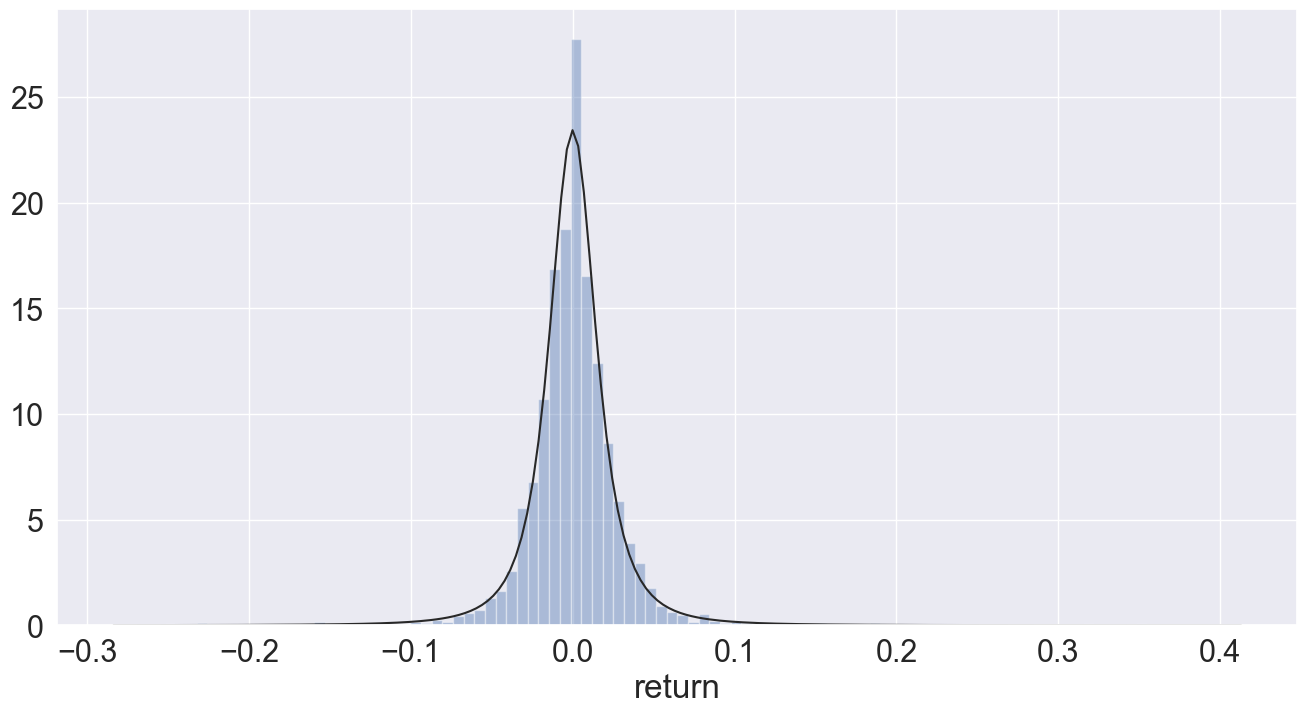

In [67]:
sns.distplot(df_asset['return'], bins=100, kde=False, fit=t);

In [68]:
(graus_de_liberdade,  media_t, desvio_padrao_t) = t.fit(df_asset['return'])
print('Distribuição T-Student\nGraus de liberdade = {:.2f} \nMédia = {:.4f} \nDesvio padrão = {:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade = 2.41 
Média = 0.0001 
Desvio padrão = 0.01538


In [69]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.45852643%


In [70]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 218 dias
Ou uma vez a cada 0 anos


In [71]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a cada 915 dias
Ou uma vez a cada 3 anos


In [72]:
frequencia_observada = df_asset['return'].size / df_asset[df_asset["return"] < -PERCENT_NUMBER].shape[0] 
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 161 dias


# Estudo de caso: IBOV

In [73]:
df_ibov = yf.download('^BVSP', start='2000-01-01')[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed


In [74]:
df_ibov_aux = aux.pfun_calcular_retorno(df_ibov)
df_ibov_aux

price  daily_return  acum_return
Date                                                
2000-01-03   16930.000000      0.000000     1.000000
2000-01-04   15851.000000     -0.063733     0.936267
2000-01-05   16245.000000      0.024856     0.959539
2000-01-06   16107.000000     -0.008495     0.951388
2000-01-07   16309.000000      0.012541     0.963320
...                   ...           ...          ...
2023-11-24  125542.000000     -0.008169     7.415357
2023-11-27  125683.000000      0.001123     7.423686
2023-11-28  126538.000000      0.006803     7.474188
2023-11-29  126101.000000     -0.003454     7.448376
2023-11-30  127263.976562      0.009223     7.517069

[5921 rows x 3 columns]

## Plotando gráfico de preço

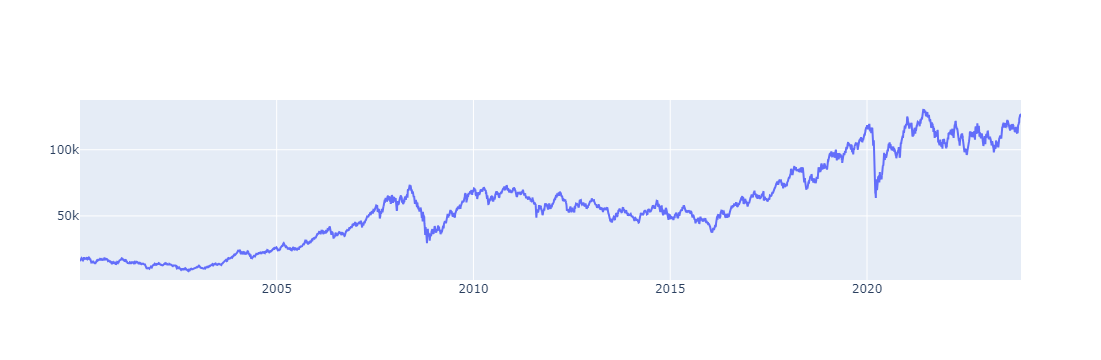

In [75]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ibov_aux.index, y=df_ibov_aux['price']))
fig.show()

In [76]:
#verificando os melhores dias
FILTER_NUMBER = 10
ibov_melhores = df_ibov_aux['daily_return'].sort_values(ascending=False)[:FILTER_NUMBER]
ibov_melhores

Date
2008-10-13    0.146560
2020-03-13    0.139082
2008-10-28    0.134262
2020-03-24    0.096885
2008-09-19    0.095657
2008-11-24    0.094013
2008-10-20    0.083574
2008-12-08    0.083119
2008-09-30    0.076323
2001-01-03    0.076110
Name: daily_return, dtype: float64

In [77]:
#os piores dias
ibov_piores = df_ibov_aux['daily_return'].sort_values(ascending=True)[:FILTER_NUMBER]
ibov_piores

Date
2020-03-12   -0.147797
2020-03-16   -0.139215
2020-03-09   -0.121738
2008-10-15   -0.113931
2020-03-18   -0.103488
2008-10-22   -0.101760
2008-09-29   -0.093634
2017-05-18   -0.087992
2011-08-08   -0.080851
2008-11-12   -0.077505
Name: daily_return, dtype: float64

In [78]:
ibov_sem_melhores_dias = (1 + df_ibov_aux['daily_return'].drop(ibov_melhores.index)).cumprod()
ibov_sem_piores_dias = (1 + df_ibov_aux['daily_return'].drop(ibov_piores.index)).cumprod()

In [79]:
print("Retorno do IBOV desde 1995: {:.2%}".format(df_ibov_aux['acum_return'].iloc[-1] - 1))
print("Retorno do IBOV sem os 10 piores dias: {:.2%}".format(ibov_sem_piores_dias.iloc[-1] - 1))
print("Retorno do IBOV sem os 10 melhores dias: {:.2%}".format(ibov_sem_melhores_dias.iloc[-1] - 1))

Retorno do IBOV desde 1995: 651.71%
Retorno do IBOV sem os 10 piores dias: 2233.02%
Retorno do IBOV sem os 10 melhores dias: 183.92%


## Plotando gráfico do IBOV sem os melhores/piores dias

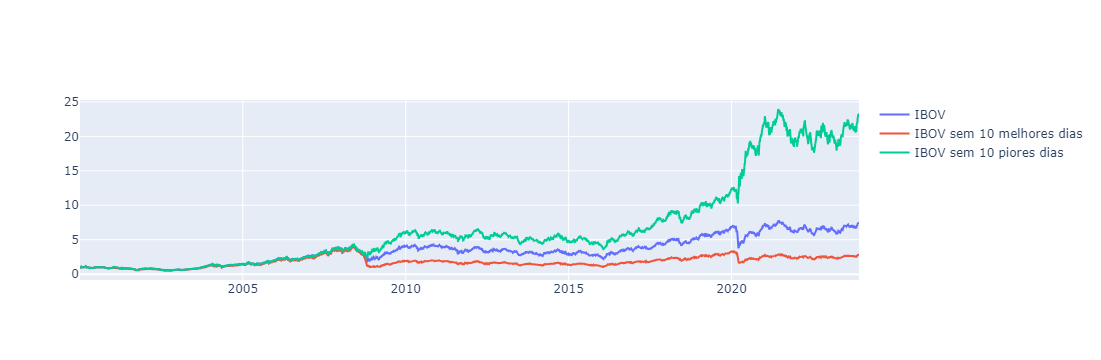

In [80]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_ibov_aux.index, y=df_ibov_aux['acum_return'], name='IBOV'))
fig.add_trace(go.Scatter(x=ibov_sem_melhores_dias.index, y=ibov_sem_melhores_dias.values, name=f'IBOV sem {FILTER_NUMBER} melhores dias'))
fig.add_trace(go.Scatter(x=ibov_sem_melhores_dias.index, y=ibov_sem_piores_dias.values, name=f'IBOV sem {FILTER_NUMBER} piores dias'))

fig.show()